# Understanding the problem statement and business case

1. Max Payers or Full Payers:

They have an idea of what the statement would be in advance and also prepare for the expense. They pay their outstanding credit completely.

2. Revolvers:

They are a different type of credit card holders who do not believe in paying their dues to the full.  They pay only the minimum amount due, or little more than that, and go about making purchases on their cards as usual.

3. VIP/ PRIME:

Credit card holder with high credit limit and % of full payments targeted to increase there credit limit

4. New Customer:

Credit Card with minimum number of tenure

5. Non payer :

Credit card with low precents of full payments 


# Importing libraries and dataset 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 


In [24]:
card_df= pd.read_csv('marketing_data.csv') #importing dataset 
card_df.isnull().sum() #checking for null values in dataset 

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# Visualize and Explore dataset

In [25]:
card_df.loc[(card_df['MINIMUM_PAYMENTS'].isnull()==True), 'MINIMUM_PAYMENTS'] = card_df['MINIMUM_PAYMENTS'].mean()
card_df.loc[(card_df['CREDIT_LIMIT'].isnull()==True), 'CREDIT_LIMIT'] = card_df['CREDIT_LIMIT'].mean()

#filling null values with mean of its column to avoid future errors

card_df.isnull().sum() #checking for null values in dataset

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

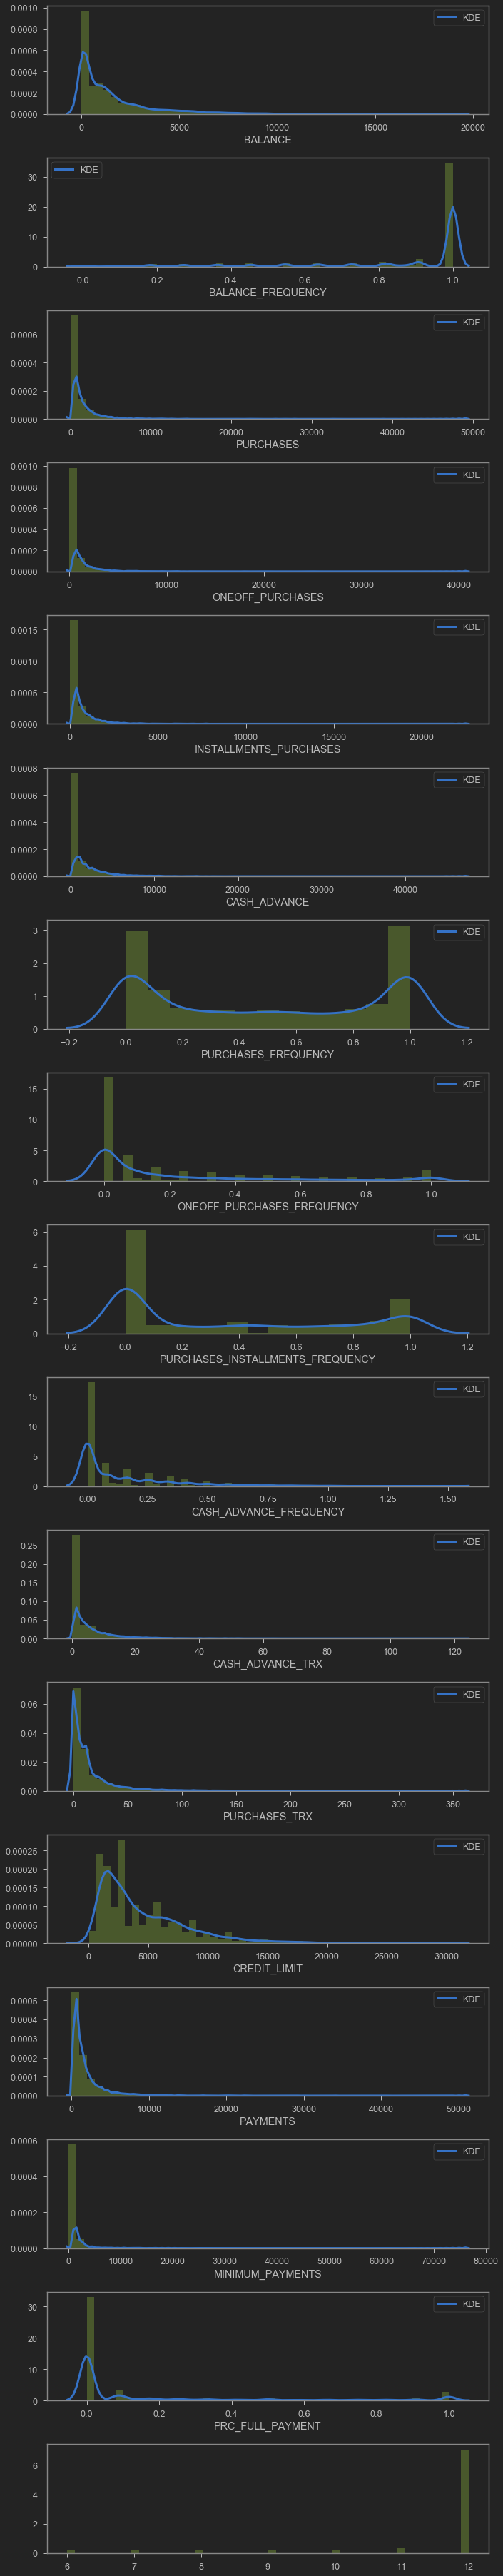

In [27]:
card_df.drop('CUST_ID',axis=1, inplace= True) # dropping CUST_ID column because it has no correaltion with other columns 

plt.figure(figsize=(10,50)) #defining Figure Size
for i in range(len(card_df.columns)):
    plt.subplot(17, 1, i+1) #defining subplot with 17 rows of figure and 1 figure for each row 
    sns.distplot(card_df[card_df.columns[i]], kde_kws= {'color':'b', 'lw':3, 'label':'KDE'},
               hist_kws={'color':'g'}) #using distibutional plot from seaborn to visualize the distibution of each features in dataset
    plt.tight_layout()# by using this command to avoid overlapping of figures in subplots 

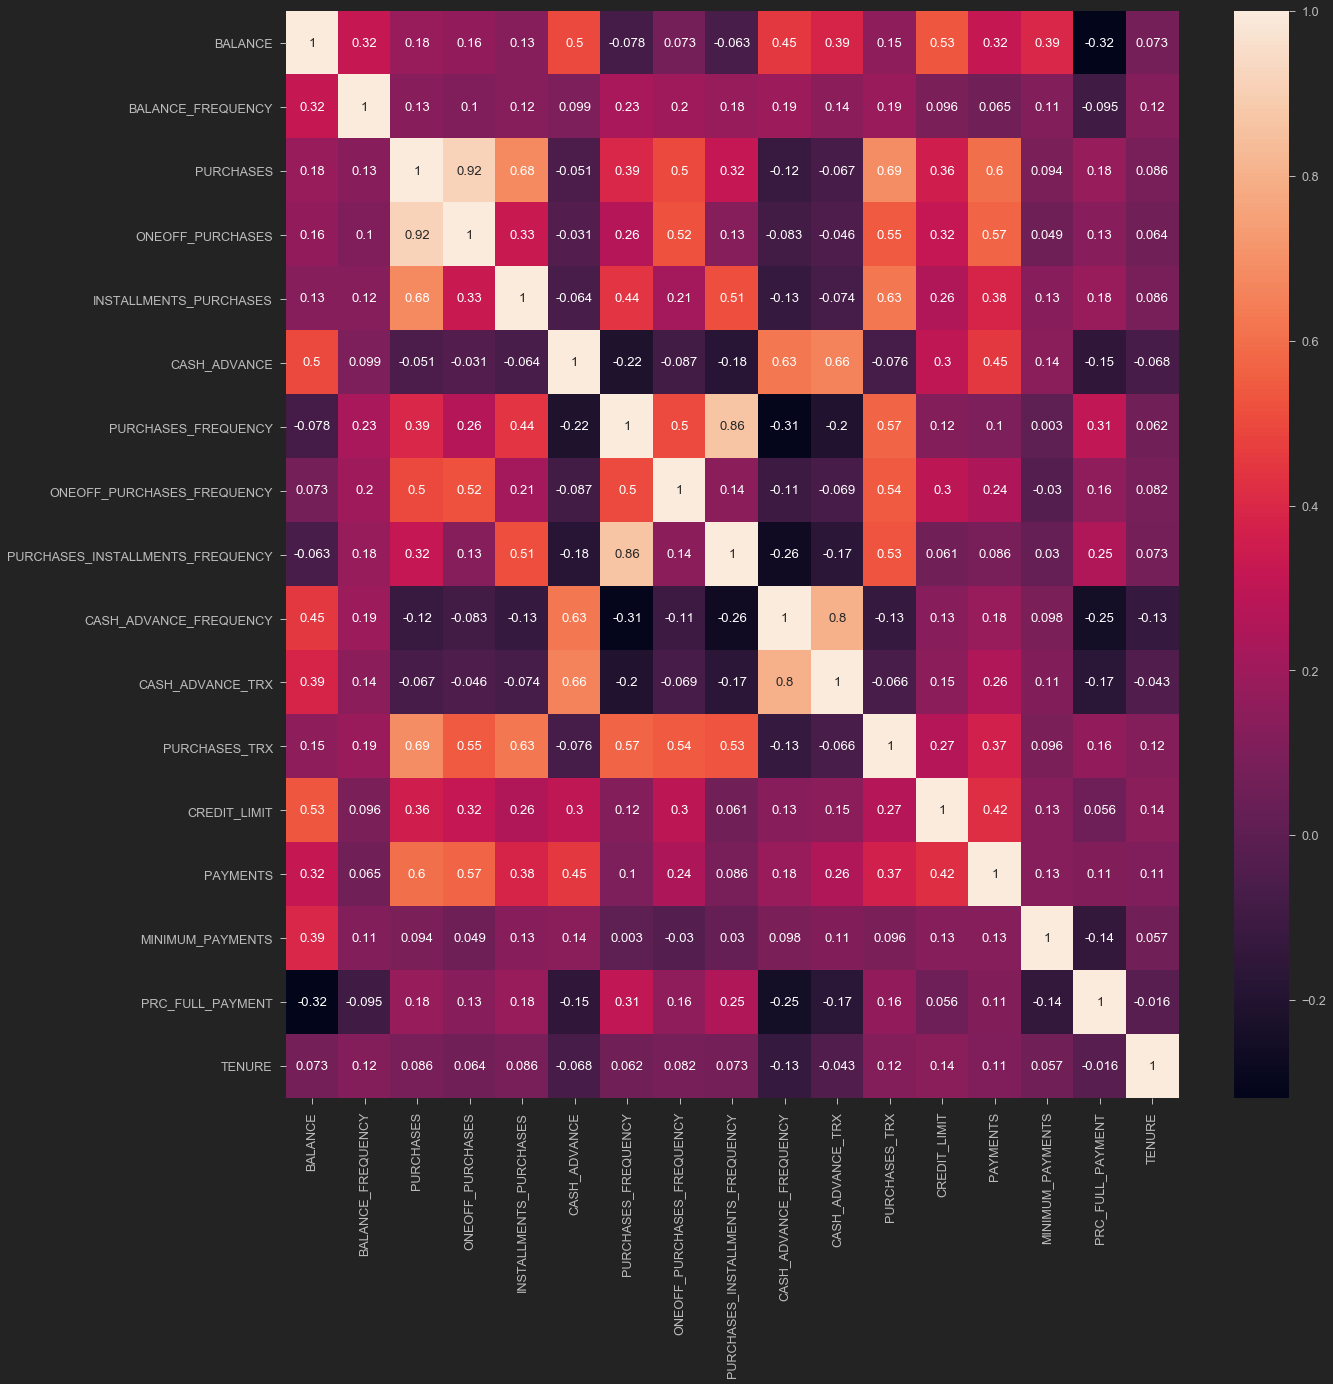

In [9]:
correlation = card_df.corr() # finding correlation between features of the datasets
plt.figure(figsize=(20,20)) # defining figure size
sns.heatmap(correlation, annot= True) # using heatmap plot from seaborn to visualize correlations betwwen features across the dataset

# Preprocessing the Dataset

In [10]:
scaled = StandardScaler() # creating a object to StandardScaler function from sklearn lib
card_df_scaled = scaled.fit_transform(card_df) #scaling all datasets for future use 
card_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

# Using Elbow method to Find Optimal Number of Clusters

Text(0, 0.5, 'WCSS value')

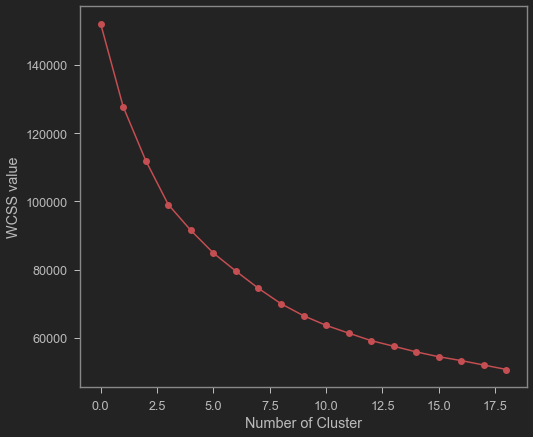

In [54]:
score= [] # creating a array to store WCSS values 
range_val = range(1,20) # ranging maximum number of cluster to test 

for i in range_val:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(card_df_scaled) 
    score.append(kmeans.inertia_) # storing WCSS values into score array for range of number of cluster in test
plt.plot(score, 'ro-')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS value')
# By ploting we can visualize WCSS values VS Number of cluster graph create a Elbow around 5. 
# After 5 clusters we can able of obveser Linearality in graph. Hence optimal number cluster was 5 

# Clustering Dataset Using K-mean Algorithm

In [85]:
kmeans = KMeans(n_clusters = 5) # creating object for KMeans with 5 clusters
kmeans.fit(card_df_scaled) # training the object with Scaled dataset 
labels = kmeans.labels_# storing labels from trained object 
labels= pd.Series(labels)
labels= labels.replace([0,1,2,3,4],['New Customer','VIP/ PRIME','Revolvers','Max Players','Non payer'])
kmeans.cluster_centers_.shape

(5, 17)

In [68]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns= card_df.columns)
#creating a dataframe to store centroids to all clusters 
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.441624,0.105004,-0.096103,-0.256440,0.243845,-0.381893,0.912280,-0.398972,1.080896,-0.485297,-0.372129,0.077843,-0.355966,-0.275884,-0.079587,0.403976,-0.046513
1,1.466551,0.382502,-0.238739,-0.174952,-0.243170,1.737917,-0.522707,-0.241364,-0.458500,1.776962,1.670580,-0.295369,0.839232,0.641413,0.499242,-0.402845,-0.102454
2,0.158653,0.431358,0.896181,0.840422,0.574939,-0.298137,1.080315,1.782363,0.556321,-0.384338,-0.306754,1.159997,0.681981,0.360735,-0.014757,0.382944,0.276932
3,1.430238,0.419467,6.915048,6.083034,5.172266,0.038778,1.090699,1.879303,1.049413,-0.249227,-0.038166,4.646228,2.198371,4.783704,1.080945,0.824001,0.334613
4,-0.246643,-0.339006,-0.339038,-0.220898,-0.395685,-0.171390,-0.814735,-0.353873,-0.751613,-0.082293,-0.152860,-0.473065,-0.316652,-0.251135,-0.116371,-0.284109,-0.046351


In [57]:
centers= scaled.inverse_transform(cluster_centers) 
# using inverse transfrom to view actual data from scaled data 

In [58]:
centers = pd.DataFrame(data = centers, columns= card_df.columns)
# creating a dataframe to store actual centroid data
centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1894.697328,0.979455,2917.908886,1987.365134,930.977592,353.664281,0.923933,0.734171,0.585533,0.058234,1.155459,43.543022,6975.775324,2777.435595,829.815490,0.265719,11.887925
1,4616.977320,0.967882,493.136111,302.052352,191.172014,4623.363303,0.280563,0.130454,0.182218,0.490732,14.649306,7.368056,7547.920612,3589.972494,2027.669496,0.035889,11.380208
2,645.271105,0.902145,797.879354,166.799462,631.574004,178.022789,0.856492,0.083437,0.794013,0.038031,0.709317,16.644720,3199.298680,934.485329,678.731868,0.271871,11.455072
3,1051.107777,0.796963,278.843906,225.791285,53.254890,619.459069,0.163358,0.096890,0.065727,0.118677,2.205672,2.951201,3342.338899,1006.133097,593.008906,0.070618,11.455289
4,4541.393882,0.976638,15777.311395,10689.027791,5088.283605,1060.190695,0.928101,0.763090,0.781501,0.085271,2.988372,130.197674,12493.023256,15581.496801,3383.304083,0.394721,11.965116


In [59]:
ymeans = kmeans.predict(card_df_scaled)
# predicting/clustering scaled data using trained object 
ymeans

array([3, 1, 0, ..., 2, 3, 3])

In [79]:
card_predict_df = pd.concat([card_df, pd.DataFrame({'CLUSTER':labels})],axis=1)
card_predict_df['CLUSTER'] =card_predict_df['CLUSTER'].replace([0,1,2,3,4],['New Customer','VIP/ PRIME','Revolvers','Max Players','Non payer'])
# creating a dataframe to store all predicted data with cluster name
card_predict_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,Non payer
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,VIP/ PRIME
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,Revolvers
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,Non payer
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,Non payer


# Apply Principal Component Analysis (PCA) technique to perform dimensionality reduction and Data visualization 

In [88]:
pca = PCA(n_components = 2) # creating a object using PCA with 2 components
principal_comp = pca.fit_transform(card_df_scaled) # transforming scaled data for dimensionality reduction

pca_df = pd.DataFrame(data = principal_comp, columns=['PCA1', 'PCA2'])
# creating a dataframe to store PCA data 
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
# updating dataframe with cluster names
pca_df.head()

,PCA1,PCA2,cluster
0,-1.682222,-1.076448,VIP/ PRIME
1,-1.138300,2.506485,Max Players
2,0.969690,-0.383529,New Customer
3,-0.873630,0.043170,VIP/ PRIME
4,-1.599434,-0.688579,VIP/ PRIME


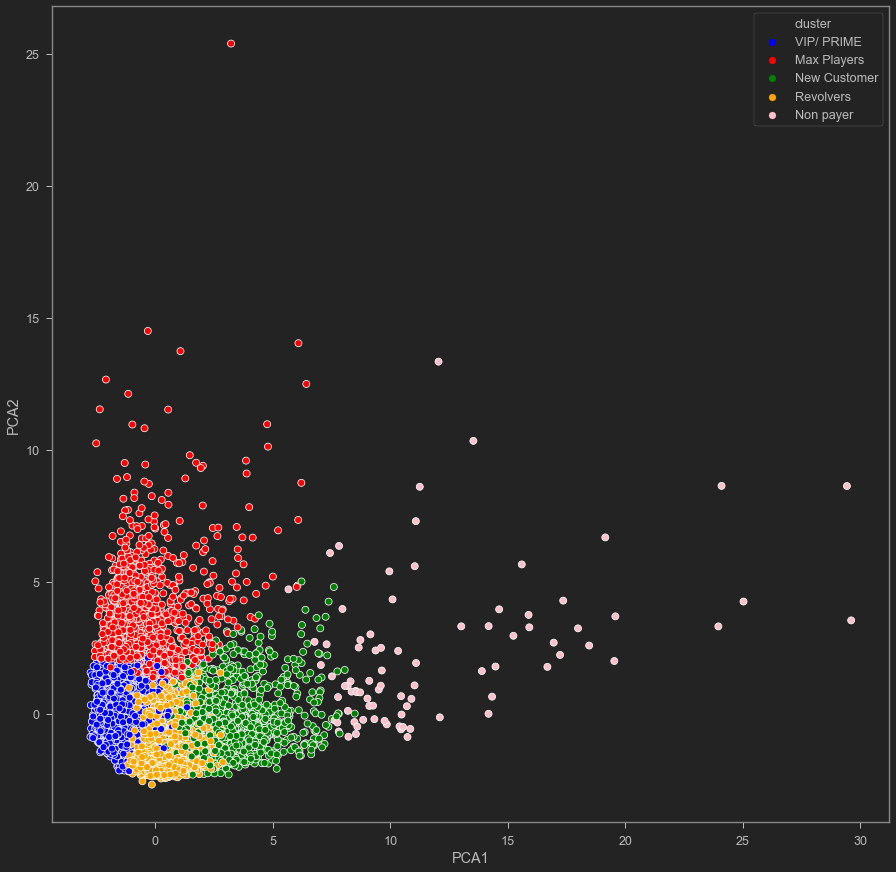

In [87]:
plt.figure(figsize=(15,15))
sns.scatterplot(x= 'PCA1', y= 'PCA2',hue= 'cluster', data= pca_df, palette= ['blue','red','green','orange','pink'] )
#using scatter plot from seaborn to visualize the clusters 